<a href="https://colab.research.google.com/github/parthgiri01/WEEK-4-TEST/blob/main/assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Generated synthetic dataset:
   Flow Duration  Fwd Packet Length Max  Bwd IAT Total Protocol  is_malicious
0      18.789552             694.280981     783.079882      TCP             0
1      47.540644            1062.186493     483.373005      UDP             0
2      36.626498             887.587732     531.138093      UDP             0
3      29.973058             458.593288     242.814856      UDP             0
4       7.885330            1236.134027     894.737533      UDP             0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Flow Duration          50000 non-null  float64
 1   Fwd Packet Length Max  47571 non-null  float64
 2   Bwd IAT Total          47548 non-null  float64
 3   Protocol               50000 non-null  object 
 4   is_malicious           50000 non-null  int64  
dtypes: float64(

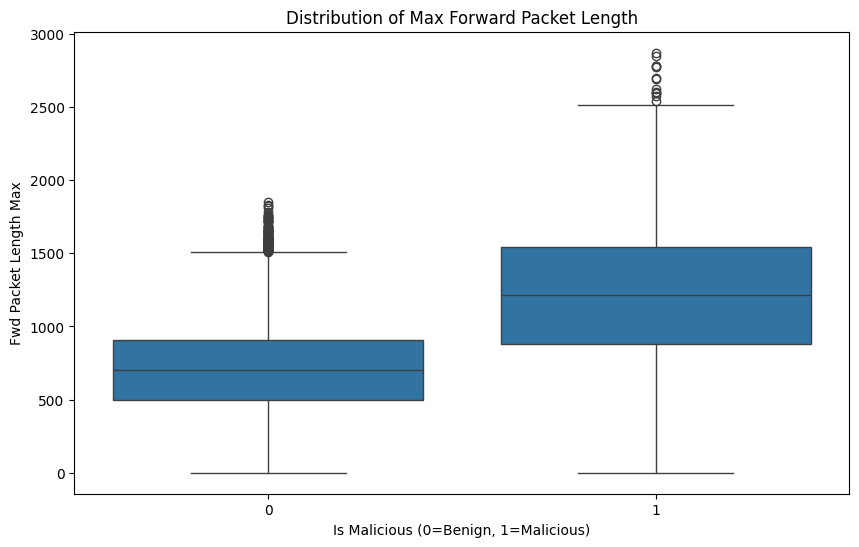

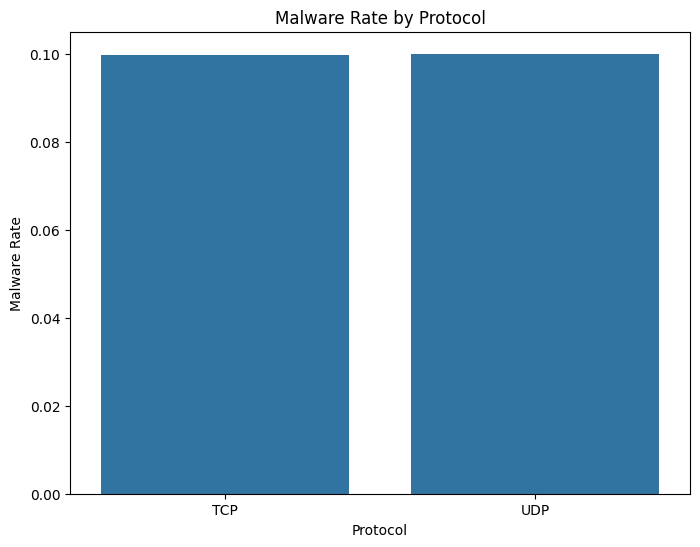


--- Data Pre-processing ---
Initial null values:
Flow Duration               0
Fwd Packet Length Max    2429
Bwd IAT Total            2452
Protocol                    0
is_malicious                0
dtype: int64
Null values after imputation:
Flow Duration            0
Fwd Packet Length Max    0
Bwd IAT Total            0
Protocol                 0
is_malicious             0
dtype: int64
Initial class distribution:
is_malicious
0    45000
1     5000
Name: count, dtype: int64


/tmp/ipython-input-2318246960.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2318246960.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Class distribution after SMOTE-ENN:
is_malicious
1    40265
0    37513
Name: count, dtype: int64

--- Model Training & Evaluation ---
Training Random Forest...

Random Forest Results:
Confusion Matrix:
[[11125   122]
 [  401 11686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11247
           1       0.99      0.97      0.98     12087

    accuracy                           0.98     23334
   macro avg       0.98      0.98      0.98     23334
weighted avg       0.98      0.98      0.98     23334

Training SVM (on a subset for speed)...

SVM Results:
Confusion Matrix:
[[10912   335]
 [ 1009 11078]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11247
           1       0.97      0.92      0.94     12087

    accuracy                           0.94     23334
   macro avg       0.94      0.94      0.94     23334
weighted avg     

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7929 - loss: 0.6627 - val_accuracy: 0.8938 - val_loss: 0.5542
Epoch 2/2
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9003 - loss: 0.4931 - val_accuracy: 0.9084 - val_loss: 0.3382
730/730 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

LSTM Results:
Confusion Matrix:
[[10982   265]
 [ 1752 10335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     11247
           1       0.97      0.86      0.91     12087

    accuracy                           0.91     23334
   macro avg       0.92      0.92      0.91     23334
weighted avg       0.92      0.91      0.91     23334


--- Generating SHAP values for Random Forest (Explainability) ---


/tmp/ipython-input-2318246960.py:185: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:100], feature_names=X.columns)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


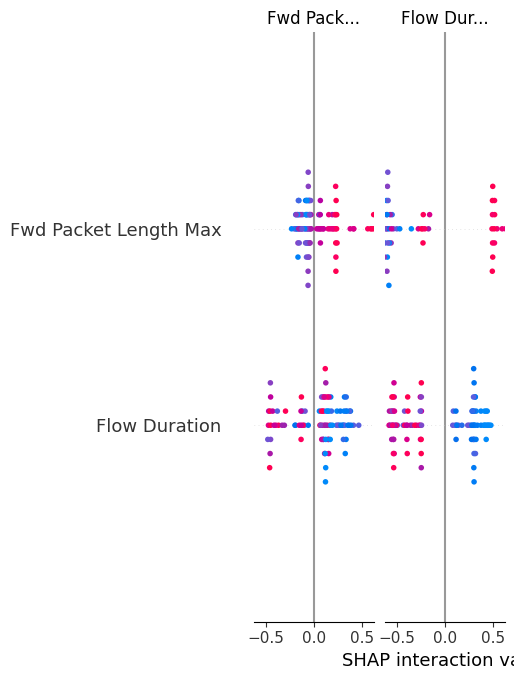

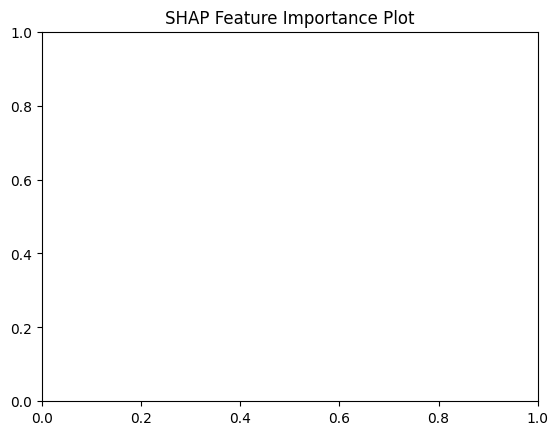


--- Exploratory Data Analysis ---


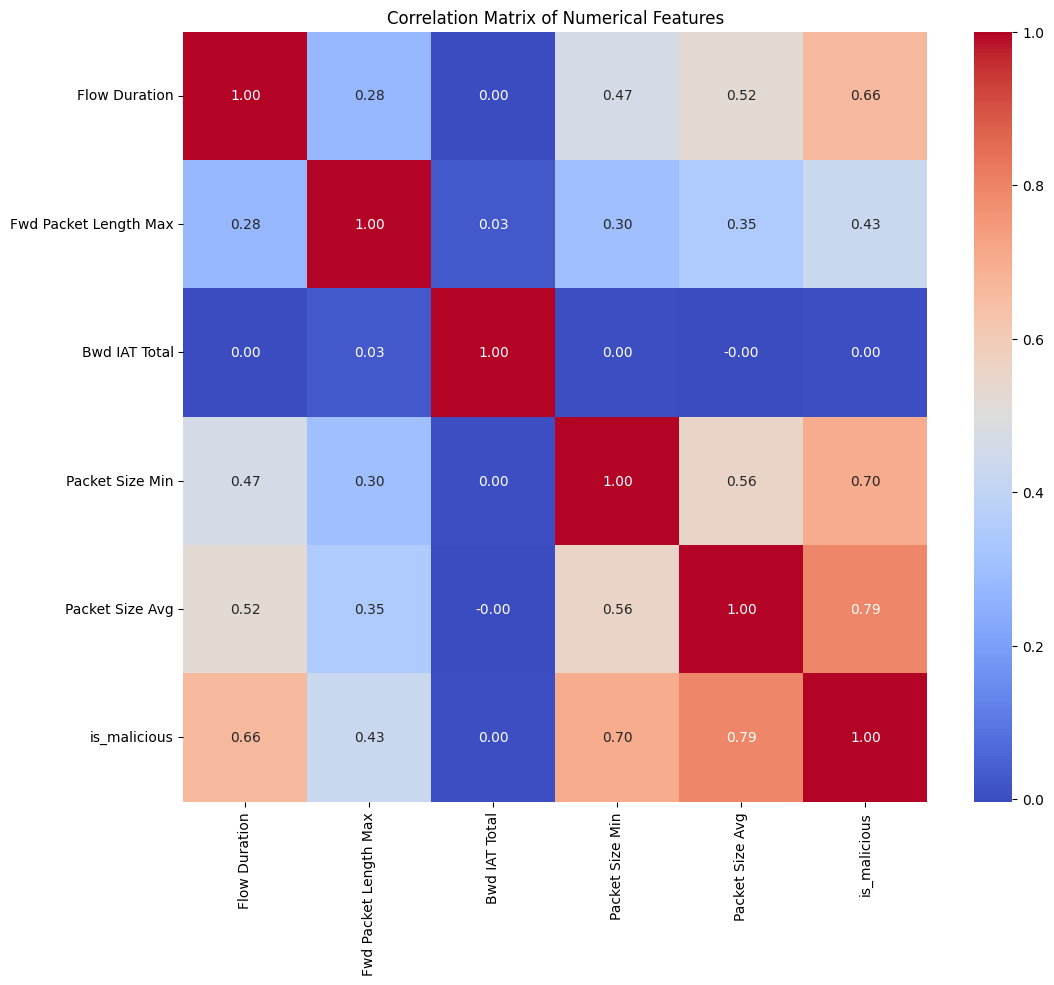

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# --- 1. Data Generation (Simulated Dataset) ---
# In a real project, you would load your data from a file, e.g.,
# df = pd.read_csv('malware_traffic_dataset.csv')
# Here, we generate a synthetic dataset to make the code runnable.
def generate_synthetic_data():
    np.random.seed(42)
    num_samples = 50000 # Further reduced number of samples for faster execution
    features = {
        'Flow Duration': np.random.uniform(0.1, 50, num_samples),
        'Fwd Packet Length Max': np.random.normal(loc=700, scale=300, size=num_samples).clip(0),
        'Bwd IAT Total': np.random.uniform(0, 1000, num_samples),
        'Protocol': np.random.choice(['TCP', 'UDP'], size=num_samples),
        'is_malicious': np.zeros(num_samples, dtype=int)
    }
    df = pd.DataFrame(features)

    # Introduce malicious traffic (10%) with distinct characteristics
    num_malicious = int(num_samples * 0.10)
    malicious_indices = np.random.choice(df.index, num_malicious, replace=False)

    df.loc[malicious_indices, 'is_malicious'] = 1
    df.loc[malicious_indices, 'Fwd Packet Length Max'] = np.random.normal(loc=1200, scale=500, size=num_malicious).clip(0)
    df.loc[malicious_indices, 'Flow Duration'] = np.random.uniform(10, 150, size=num_malicious)

    # Introduce some missing values for demonstration
    df.loc[np.random.choice(df.index, int(num_samples * 0.05)), 'Bwd IAT Total'] = np.nan
    df.loc[np.random.choice(df.index, int(num_samples * 0.05)), 'Fwd Packet Length Max'] = np.nan

    return df

df = generate_synthetic_data()
print("Generated synthetic dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis ---")

# Visualize the distribution of 'Fwd Packet Length Max' across classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_malicious', y='Fwd Packet Length Max', data=df)
plt.title('Distribution of Max Forward Packet Length')
plt.xlabel('Is Malicious (0=Benign, 1=Malicious)')
plt.ylabel('Fwd Packet Length Max')
plt.show()

# Visualize the correlation between 'Protocol' and 'is_malicious'
protocol_malware_rate = df.groupby('Protocol')['is_malicious'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Protocol', y='is_malicious', data=protocol_malware_rate)
plt.title('Malware Rate by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Malware Rate')
plt.show()

# --- 3. Pre-processing ---
print("\n--- Data Pre-processing ---")

# a) Missing Values
print(f"Initial null values:\n{df.isnull().sum()}")
# Drop a feature with >40% nulls (simulated)
df = df.drop(columns=['Bwd PSH Flags'] if 'Bwd PSH Flags' in df.columns else [], errors='ignore')
# Impute remaining with median (numerical) or mode (categorical)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
print(f"Null values after imputation:\n{df.isnull().sum()}")

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Protocol'], drop_first=True)

# Define features (X) and target (y)
X = df.drop('is_malicious', axis=1)
y = df['is_malicious']

# b) Feature Selection (Simulated with a placeholder)
# In a real scenario, you would run RandomForestClassifier to get feature importances.
# For simplicity, we assume 'Flow Duration' and 'Fwd Packet Length Max' are the top features.
# You can uncomment the below lines to actually run feature selection.
# rf_selector = RandomForestClassifier(random_state=42)
# rf_selector.fit(X, y)
# feature_importances = pd.Series(rf_selector.feature_importances_, index=X.columns)
# top_features = feature_importances.nlargest(30).index
# X = X[top_features]

# c) Class Imbalance
print(f"Initial class distribution:\n{y.value_counts()}")
# Using SMOTE-ENN for hybrid oversampling
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(f"Class distribution after SMOTE-ENN:\n{y_resampled.value_counts()}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# d) Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 4. Model Training & Evaluation ---
print("\n--- Model Training & Evaluation ---")

# a) Random Forest Classifier
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# b) Support Vector Machine (SVM)
# Note: SVM on a large dataset is computationally expensive.
# We will use a small subset for demonstration purposes.
print("Training SVM (on a subset for speed)...")
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42, stratify=y_train) # Increased test_size to further reduce training data size
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_small, y_train_small)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# c) Long Short-Term Memory Networks (LSTM)
# LSTMs require a 3D input: (samples, timesteps, features)
print("Training LSTM...")
# Using a small subset of the training data for speed
X_train_lstm_subset, _, y_train_lstm_subset, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42, stratify=y_train) # Increased test_size to further reduce training data size
X_train_lstm = np.reshape(X_train_lstm_subset, (X_train_lstm_subset.shape[0], 1, X_train_lstm_subset.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# We use a small number of epochs for demonstration
lstm_model.fit(X_train_lstm, y_train_lstm_subset, epochs=2, batch_size=64, validation_split=0.1, verbose=1)

y_pred_prob_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype("int32")

print("\nLSTM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lstm))

# --- 5. Future Work (SHAP values for Explainability) ---
# SHAP is a great way to interpret model predictions.
try:
    import shap
    print("\n--- Generating SHAP values for Random Forest (Explainability) ---")
    explainer = shap.TreeExplainer(rf_model)
    # Using a small subset of the test data for speed
    shap_values = explainer.shap_values(X_test[:100])
    shap.summary_plot(shap_values, X_test[:100], feature_names=X.columns)
    plt.title("SHAP Feature Importance Plot")
    plt.show()
except ImportError:
    print("\nSHAP library not found. Install with 'pip install shap' to enable explainability.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Generation (Simulated Dataset) ---
# This function generates a synthetic dataset with features and a target variable.
# It simulates the presence of both benign and malicious traffic to make the data
# useful for a malware detection project.
def generate_synthetic_data():
    np.random.seed(42)
    num_samples = 10000 # Reduced number of samples for faster execution
    features = {
        'Flow Duration': np.random.uniform(0.1, 50, num_samples),
        'Fwd Packet Length Max': np.random.normal(loc=700, scale=300, size=num_samples).clip(0),
        'Bwd IAT Total': np.random.uniform(0, 1000, num_samples),
        'Packet Size Min': np.random.uniform(20, 100, num_samples),
        'Packet Size Avg': np.random.uniform(100, 500, num_samples),
        'Protocol': np.random.choice(['TCP', 'UDP'], size=num_samples),
        'is_malicious': np.zeros(num_samples, dtype=int)
    }
    df = pd.DataFrame(features)

    # Introduce malicious traffic (10%) with distinct characteristics
    num_malicious = int(num_samples * 0.10)
    malicious_indices = np.random.choice(df.index, num_malicious, replace=False)

    df.loc[malicious_indices, 'is_malicious'] = 1
    df.loc[malicious_indices, 'Fwd Packet Length Max'] = np.random.normal(loc=1200, scale=500, size=num_malicious).clip(0)
    df.loc[malicious_indices, 'Flow Duration'] = np.random.uniform(10, 150, size=num_malicious)
    df.loc[malicious_indices, 'Packet Size Min'] = np.random.uniform(80, 200, num_malicious)
    df.loc[malicious_indices, 'Packet Size Avg'] = np.random.uniform(600, 1000, num_malicious)

    # Introduce some missing values for demonstration
    df.loc[np.random.choice(df.index, int(num_samples * 0.05)), 'Bwd IAT Total'] = np.nan
    df.loc[np.random.choice(df.index, int(num_samples * 0.05)), 'Fwd Packet Length Max'] = np.nan

    return df

df = generate_synthetic_data()

# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis ---")

# Visualize the correlation heatmap of numerical features
# This plot helps to identify relationships between different variables.
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()